In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import data from CSV
data = pd.read_csv("Output_ZPrimeBoostedAnalysis/data.csv", delimiter=" ")
ttbar_lep = pd.read_csv("Output_ZPrimeBoostedAnalysis/ttbar_lep.csv", delimiter=" ")
ZPrime1000 = pd.read_csv("Output_ZPrimeBoostedAnalysis/ZPrime1000_tt.csv", delimiter=" ")


In [3]:
ttbar_lep

,etmiss,mtw,leadleptPt,leadleptEta,leadleptE,leadleptPhi,Q_leadlep,leadleptID,n_TopLRjets,leadTopLRjet_pt,...,n_bjets,leadbjet_pt,leadbjet_eta,ttbarMLR,largeRjet_pt_total,largeRjet_eta_total,largeRjet_phi_total,largeRjet_m_total,largeRjet_tau32_total,weight
0,138.4410,93.9966,130.0400,-0.441658,142.9300,1.062900,-1,11,1,333.228,...,2,273.231,0.869808,750.620,333.228,1.081890,-2.649140,147.914,0.326111,0.326103
1,301.5390,76.2308,37.1797,-0.585588,43.7388,-0.827447,-1,13,1,498.220,...,1,346.317,-1.736670,0.000,498.220,-1.644730,1.538870,127.010,0.651911,1.144100
2,121.4360,67.4178,45.7490,0.718775,58.0845,1.089530,-1,11,1,327.376,...,2,216.480,0.122479,0.000,327.376,0.278645,-1.164760,129.256,0.497427,0.585280
3,47.9440,188.8650,188.4250,-0.518880,214.3640,-0.272070,-1,13,1,374.357,...,2,253.381,-1.960430,899.172,374.357,-1.762890,2.938160,129.779,0.746580,0.692242
4,39.7981,43.7249,47.7372,1.661620,130.2670,-3.042710,-1,13,1,331.558,...,1,265.127,0.752085,673.801,611.219,1.227440,-3.334090,162.214,0.966985,1.200830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154760,57.2860,40.9154,62.1744,1.680050,172.6010,0.547535,-1,11,1,311.611,...,1,266.780,-0.395491,0.000,311.611,-0.303151,2.601820,102.453,0.490593,1.131250
154761,156.8420,6.0424,221.7000,1.566210,553.9510,-1.876650,1,11,1,499.428,...,1,446.329,0.174121,0.000,499.428,0.281326,2.410640,125.979,0.472799,0.849809
154762,220.8640,44.9105,30.1318,0.984358,45.9475,-3.112210,-1,11,1,428.674,...,2,349.335,-1.826620,1275.530,428.674,-1.939940,0.750768,102.550,0.740345,0.001599
154763,64.5557,35.8860,178.1710,0.976100,270.0060,-2.859350,-1,11,1,318.782,...,2,208.339,0.850805,0.000,318.782,0.525273,0.465468,153.176,0.572873,0.189975


In [4]:
data.columns

Index(['etmiss', 'mtw', 'leadleptPt', 'leadleptEta', 'leadleptE',
       'leadleptPhi', 'Q_leadlep', 'leadleptID', 'n_TopLRjets',
       'leadTopLRjet_pt', 'leadTopLRjet_eta', 'leadTopLRjet_phi',
       'leadTopLRjet_m', 'leadTopLRjet_Tau32', 'n_jets', 'leadjet_pt',
       'leadjet_eta', 'n_bjets', 'leadbjet_pt', 'leadbjet_eta', 'ttbarMLR',
       'largeRjet_pt_total', 'largeRjet_eta_total', 'largeRjet_phi_total',
       'largeRjet_m_total', 'largeRjet_tau32_total', 'weight'],
      dtype='object')

In [5]:
# etmiss = MET
# mtw 
# lep_charge = Q_leadlep (leadleptch)
# lep_type = leadleptID
# lepton_1_eta = leadleptEta
# lepton_1_E = leadleptE
# lepton_1_phi = leadleptPhi
# lepton_1_pt = leadleptPt
# largeRjet_tau32 = leadTopLRjet_Tau32
# largeRjet_m = leadTopLRjet_m
# largeRjet_phi = leadTopLRjet_phi
# largeRjet_eta = leadTopLRjet_eta
# largeRjet_pt = leadTopLRjet_pt
# TopLRjet_n = n_TopLRjets

# MISSING:
"""
leadbjet_eta    +
leadbjet_pt     +
leadjet_eta     +
leadjet_pt      +

leadLRjet_eta   
leadLRjet_m     
leadLRjet_phi   
leadLRjet_pt    
leadLRjet_tau32 

n_bjets         + 
n_jets          +
n_leadLRjets    
ttbarMLR
"""

'\nleadbjet_eta    +\nleadbjet_pt     +\nleadjet_eta     +\nleadjet_pt      +\n\nleadLRjet_eta   \nleadLRjet_m     \nleadLRjet_phi   \nleadLRjet_pt    \nleadLRjet_tau32 \n\nn_bjets         + \nn_jets          +\nn_leadLRjets    \nttbarMLR\n'

In [6]:
ranges_bins = {"etmiss": [0, 400, 30], "leadbjet_eta": [-3, 3, 30], "leadbjet_pt": [0, 400, 20], 
                "leadjet_eta": [-3, 3, 30], "leadjet_pt": [0, 400, 20], 
                "Q_leadlep": [-1.5, 1.5, 7], "leadleptE": [0, 500, 30], "leadleptEta": [-3, 3, 30], 
                "leadleptID": [6, 20, 15], "leadleptPhi":[-3.2, 3.2, 32], "leadleptPt": [0, 400, 20], 
                "largeRjet_eta_total": [-3, 3, 20], "largeRjet_m_total": [50, 250, 30], "largeRjet_phi_total": [-3.2, 3.2, 12],
                "largeRjet_pt_total": [250, 700, 30], "largeRjet_tau32_total": [0, 1, 20], "leadTopLRjet_eta": [-3, 3, 20],
                "leadTopLRjet_m": [100, 250, 25], "leadTopLRjet_phi": [-3.2, 3.2, 12], 
                "leadTopLRjet_pt": [250, 700, 30],
                "leadTopLRjet_Tau32": [0, 1, 20], "mtw": [0, 250, 30], "n_bjets": [-0.5, 3.5, 4], 
                "n_jets": [-0.5, 3.5, 4], "n_TopLRjets": [-0.5, 3.5, 4],
                "ttbarMLR": [400, 1600, 20]}
# "leadTopLRjet_syst_pt": [250, 700, 30], 
# "n_leadLRjets": [-0.5, 3.5, 4],

In [7]:
# plot histograms
# for key in ranges_bins:
    # data.plot.hist(y=key, bins=np.linspace(ranges_bins[key][0], ranges_bins[key][1], ranges_bins[key][2]+1), histtype="step", linewidth=2)
    # ttbar_lep.plot.hist(y=key, bins=np.linspace(ranges_bins[key][0], ranges_bins[key][1], ranges_bins[key][2]), histtype="step", linewidth=2)
    # ZPrime1000.plot.hist(y=key, bins=np.linspace(ranges_bins[key][0], ranges_bins[key][1], ranges_bins[key][2]), histtype="step", linewidth=2)
    # plt.show()

0        1
1        1
2        1
3        1
4        1
        ..
13983    1
13984    1
13985    1
13986    1
13987    1
Name: weight, Length: 13988, dtype: int64
0         0.326103
1         1.144100
2         0.585280
3         0.692242
4         1.200830
            ...   
154760    1.131250
154761    0.849809
154762    0.001599
154763    0.189975
154764    1.257250
Name: weight, Length: 154765, dtype: float64


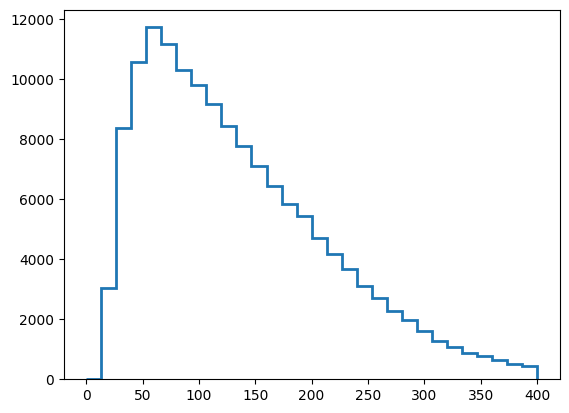

In [8]:
plot_features = ["etmiss", "mtw", "Q_leadlep", "leadleptID", "leadleptEta", "leadleptE", "leadleptPhi", "leadleptPt",
                 "leadTopLRjet_Tau32","leadTopLRjet_m", "leadTopLRjet_phi", "leadTopLRjet_eta", "leadTopLRjet_pt", "n_TopLRjets", "n_bjets", "n_jets", "ttbarMLR"]

# multiply all columns by the weights

print(data["weight"])
print(ttbar_lep["weight"])

plt.hist(ttbar_lep["etmiss"], bins=30, histtype="step", linewidth=2, weights=ttbar_lep["weight"], range=(0, 400))
plt.show()



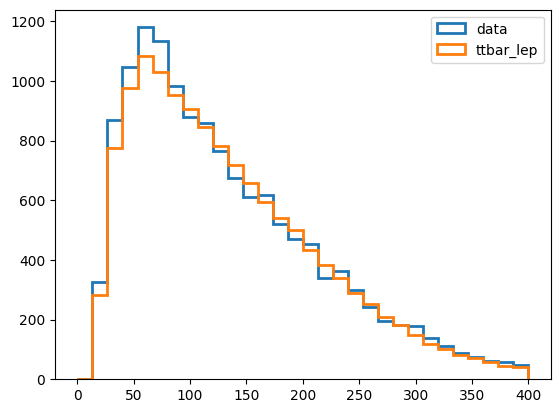

In [21]:
plt.hist(data["etmiss"], bins=30, histtype="step", linewidth=2, range=(0, 400), label="data")
plt.hist(ttbar_lep["etmiss"], bins=30, histtype="step", linewidth=2, range=(0, 400), label="ttbar_lep", weights=ttbar_lep["weight"]*0.0924183)

# plt.hist(ttbar_lep["etmiss"], bins=30, histtype="step", linewidth=2, range=(0, 400), label="ttbar_s_w")
plt.legend()
plt.show()



(array([4.3340e+03, 1.9350e+03, 4.6290e+03, 6.3660e+03, 1.8913e+04,
        2.0226e+04, 1.1241e+04, 1.2238e+04, 3.0241e+04, 2.8457e+04,
        8.1810e+03, 4.0930e+03, 2.2690e+03, 1.0630e+03, 3.0400e+02,
        8.6000e+01, 3.6000e+01, 2.5000e+01, 1.2000e+01, 1.2000e+01,
        5.0000e+00, 8.0000e+00, 1.6000e+01, 2.1000e+01, 2.2000e+01,
        1.7000e+01, 7.0000e+00, 4.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([0.        , 0.01224804, 0.02449609, 0.03674413, 0.04899217,
        0.06124022, 0.07348826, 0.0857363 , 0.09798435, 0.11023239,
        0.12248043, 0.13472848, 0.14697652, 0.15922456, 0.17147261,
        0.18372065, 0.19596869, 0.20821674, 0.22046478, 0.23271282,
        0.24496087, 0.25720891, 0.26945695, 0.281705  , 0.29395304,
        0.30620108, 0.31844912, 0.33069717, 0.34294521, 0.35519325,
        0.3674413 ]),
 [<matplotlib.patches.Polygon at 0x14616d750>])

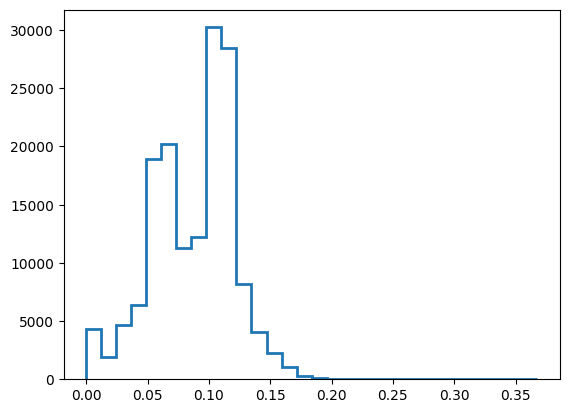

In [19]:
plt.hist(ttbar_lep["weight"]*0.0924183, bins=30, histtype="step", linewidth=2)